In [1]:
# Python script to make plots of the YSOs in NGC6822 compared to various gas and dust maps
# O C Jones

# Call the relevant python packages
import numpy as np

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.io import ascii, fits
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord
from astropy.wcs import WCS

from astropy.nddata import Cutout2D
from astropy.stats import mad_std, sigma_clipped_stats

import seaborn as sns

import aplpy

# Output plots in Notebook
%matplotlib inline

In [2]:
#########################################################
# Set paths to the Data
Spitzer_path  = '/Users/ojones/Desktop/NGC6822/spitzerMaps/'
otherwav_path = '/Users/ojones/Desktop/NGC6822/otherWav/'


# Set an output directory
outdir = '/Users/ojones/Desktop/NGC6822/maps/'


# Get the NGC 6822 Maps
NGC8622_3_file  = 'SPITZER_I1_5507072_0000_7_E8742042_maic.fits'
NGC8622_4_file  = 'SPITZER_I2_5507072_0000_7_E8743621_maic.fits'
NGC8622_5_file  = 'SPITZER_I3_5507072_0000_7_E8739070_maic.fits'
NGC8622_8_file  = 'SPITZER_I4_5507072_0000_7_E8738975_maic.fits'

NGC8622_24_file = 'SPITZER_M1_5576192_0000_10_E6048755_maic.fits'
NGC8622_70_file = 'SPITZER_M2_5576192_0000_10_E6048584_maic.fits'

NGC8622_Ha_file = 'n6822ha.fits'

NGC8622_FUV_file = 'n6822FUV.fit'
NGC8622_NUV_file = 'n6822NUV.fit'

NGC8622_u_file = 'n6822u.fits'
NGC8622_b_file = 'n6822b.fits'
NGC8622_v_file = 'n6822v.fits'

In [3]:
# Add some general coordinates on where to center each image

center_NGC6822 = SkyCoord('19:44:58.064', '-14:51:19.898',  unit=(u.hourangle, u.deg), frame='fk5')

# Width of the Area to plot in Decrees
width=0.3
height=0.3

# Other Variables
figwidth=12
figheight=8
#numberimagex=3
#numberimagey=2
#dx=0.85/numberimagex
#dy=0.85/numberimagey
#downsample=4

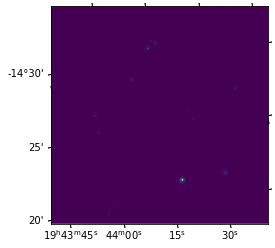

In [4]:
# Read in the [24] data
hdu = fits.open(Spitzer_path+NGC8622_24_file)[0]
wcs = WCS(hdu.header)
M1_img = hdu.data


# Define size and position to cut out for the [24]

#position = SkyCoord('19:44:59.285', '-14:50:57.951' , unit=(u.hourangle, u.deg), frame='fk5')
position = SkyCoord('19:44:49.064', '-14:47:49.898', unit=(u.hourangle, u.deg), frame='fk5')
size = u.Quantity((0.25, 0.25), u.deg)

# # Make the cutout, including the WCS
cutout = Cutout2D(M1_img, position=position, size=size, wcs=wcs)

plt.subplot(projection=wcs) 
plt.imshow(cutout.data,  origin='lower')

# Put the cutout image in the FITS HDU
hdu.data = cutout.data

# Update the FITS header with the cutout WCS
hdu.header.update(cutout.wcs.to_header())

# Write the cutout to a new FITS file
cutout_filename = '/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits'
hdu.writeto(cutout_filename, overwrite=True)

INFO: Auto-setting vmin to  3.636e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.374e+01 [aplpy.core]


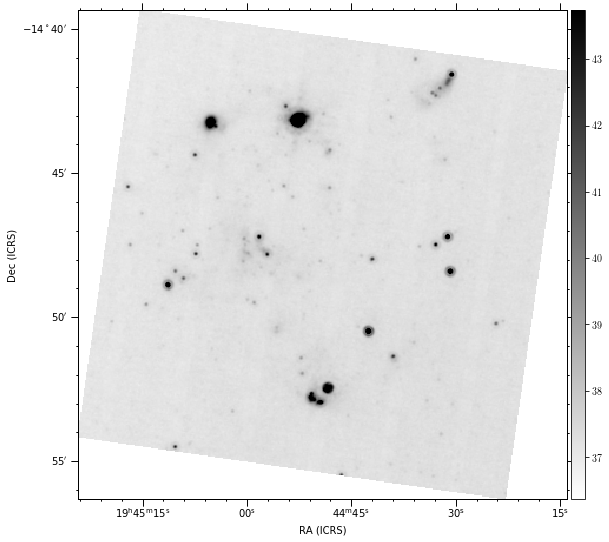

In [5]:
f24 = aplpy.FITSFigure('/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits' , north=True) 
f24.set_theme('publication')
f24.set_system_latex(True)
f24.show_grayscale(stretch='linear', invert='True' ) #,vmin=1.17, vmax=1.57)   
f24.add_colorbar()

In [6]:
# # Remove the shit arrround the edges of 8 micorn image
# hdu = fits.open(Spitzer_path+NGC8622_8_file)[0]
# wcs = WCS(hdu.header)

# plt.imshow(hdu.data[:, :])

# print(hdu.data.shape)

(367, 367)


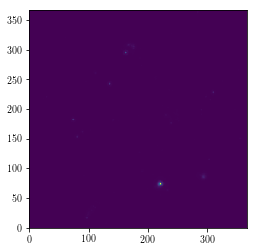

In [7]:
# Read in the 24 micorn data to determine the contour levels

# Read in the [24] data
hdu = fits.open('/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits')[0]
wcs = WCS(hdu.header)
M1_img = hdu.data

plt.imshow(hdu.data[:, :], origin='lower')

print(hdu.data.shape)

mean, median, std = sigma_clipped_stats(hdu.data, sigma=3.0)
sig = std 
#sigmalevels = [3*sig, 5*sig, 7*sig, 9*sig]
sigmalevels = [3*sig, 6*sig,  9*sig,  12*sig]
#sigmalevels = [2*sig, 3*sig, 4*sig, 5*sig, 6*sig, 7*sig, 8*sig, 9*sig, 10*sig]

#image_hist = plt.hist(M1_img.flatten(), 1000)

In [8]:
# # Test the region to cutout
# position = (2100, 1307)
# size = (2282,2260)     # pixels
# cutout = Cutout2D(hdu.data, position, size)
# plt.imshow(cutout.data)


In [9]:
# # Load the image and the WCS
# hdu = fits.open(Spitzer_path+NGC8622_8_file)[0]
# wcs = WCS(hdu.header)

# # Define size and pisition to cut out
# position = SkyCoord('19:44:59.285', '-14:50:57.951' , unit=(u.hourangle, u.deg), frame='fk5')
# size = u.Quantity((0.35, 0.21), u.deg)

# # Make the cutout, including the WCS
# cutout = Cutout2D(hdu.data, position=position, size=size, wcs=wcs)

# # Put the cutout image in the FITS HDU
# hdu.data = cutout.data

# # Update the FITS header with the cutout WCS
# hdu.header.update(cutout.wcs.to_header())

# # Write the cutout to a new FITS file
# cutout_filename = Spitzer_path+'/Users/ojones/Desktop/NGC6822/spitzerMaps/example_cutout.fits'
# hdu.writeto(cutout_filename, overwrite=True)

In [10]:
# # Load the image and the WCS
# hdu = fits.open(Spitzer_path+NGC8622_8_file)[0]
# wcs = WCS(hdu.header)

# # Define size and pisition to cut out
# position = (2100, 1307)
# size = (2282,2260)     # pixels

# # Make the cutout, including the WCS
# cutout = Cutout2D(hdu.data, position=position, size=size, wcs=wcs)

# # Put the cutout image in the FITS HDU
# hdu.data = cutout.data

# # Update the FITS header with the cutout WCS
# hdu.header.update(cutout.wcs.to_header())

# # Write the cutout to a new FITS file
# cutout_filename = '/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_I4_cutout.fits'
# hdu.writeto(cutout_filename, overwrite=True)

In [11]:
#center_NGC6822 = SkyCoord('19:44:58.064', '-14:47:49.898',  unit=(u.hourangle, u.deg), frame='fk5')
center_NGC6822 = SkyCoord('19:44:49.064', '-14:47:49.898', unit=(u.hourangle, u.deg), frame='fk5')

# Width of the Area to plot in Decrees
width=0.25
height=0.25

In [12]:
mean, median, std = sigma_clipped_stats(M1_img, sigma=3.0)
sig = std 
sigmalevels = [3*sig, 6*sig, 9*sig]
#sigmalevels = [2*sig, 3*sig, 4*sig, 5*sig, 6*sig, 7*sig, 8*sig, 9*sig, 10*sig]

print(sigmalevels+median)
print(median)

[37.57746007 37.90891793 38.2403758 ]
37.246002


INFO: Auto-setting vmax to  9.682e+00 [aplpy.core]


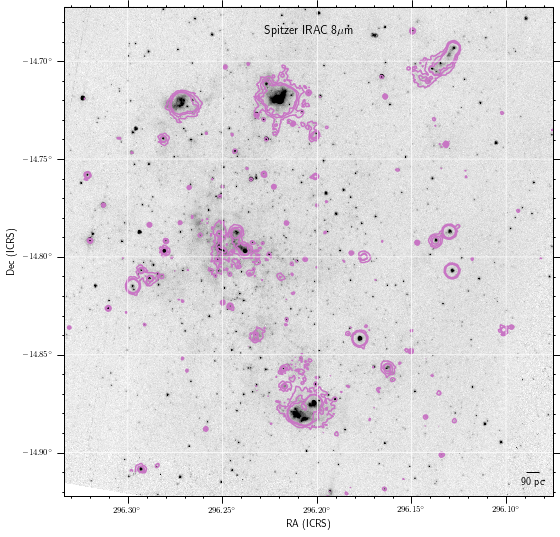

In [13]:
# Plot the 8 micron data with 24 micron contours

f8 = aplpy.FITSFigure('/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_I4_cutout.fits', north=True)

f8.set_theme('publication')
f8.set_system_latex(True)
f8.show_grayscale(stretch='linear', invert='True',vmin=7.25) #,vmin=1.17, vmax=1.57)  #stretch: linear, log, sqrt, arcsinh, power

f8.recenter(center_NGC6822.ra.deg, center_NGC6822.dec.deg, width=width, height=height)

f8.show_contour('/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits', colors=sns.xkcd_rgb["orchid"],  levels=sigmalevels+median)

# Overlay a grid
f8.add_grid()
f8.grid.set_alpha(0.9)
f8.grid.set_color('white')

# Add a scale bar
f8.add_scalebar(24  * u.arcsecond )
f8.scalebar.set_label('90 pc')

# Edit the tick markings on the figure
#f8.ticks.set_xspacing(0.02)            # x-axis tick spacing in degrees
#f8.ticks.set_yspacing(0.02)            # y-axis tick spacing in degrees
#f8.ticks.set_minor_frequency(5)        # Set to 1 to hide

# Edit the TickLabels on the figure
#f8.tick_labels.set_xformat('hh:mm:ss')
#f8.tick_labels.set_yformat('dd:mm')
f8.tick_labels.set_xformat('d.dd')
f8.tick_labels.set_yformat('d.dd')
f8.tick_labels.set_font(size='small')


#f8.add_colorbar()
#f8.remove_colorbar()

f8.add_label(0.5, 0.95, 'Spitzer IRAC 8$\mu$m', relative=True, color='black', weight="bold", size="large")


 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


INFO: Auto-setting vmin to  1.734e+02 [aplpy.core]
INFO: Auto-setting vmax to  8.130e+02 [aplpy.core]


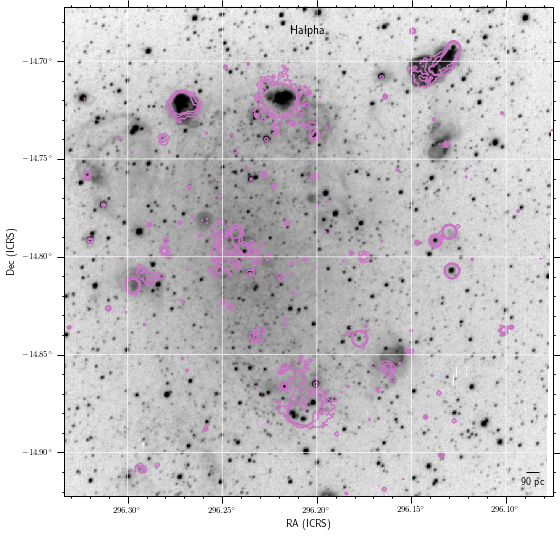

In [14]:
# Plot the Halpha micron data with 24 micron contours

ha = aplpy.FITSFigure(otherwav_path+NGC8622_Ha_file, north=True)

ha.set_theme('publication')
ha.set_system_latex(True)
ha.show_grayscale(stretch='arcsinh', invert='True' ) #,vmin=1.17, vmax=1.57)  #stretch: linear, log, sqrt, arcsinh, power

ha.recenter(center_NGC6822.ra.deg, center_NGC6822.dec.deg, width=width, height=height)

ha.show_contour('/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits', colors=sns.xkcd_rgb["orchid"],  levels=sigmalevels+median)

# Overlay a grid
ha.add_grid()
ha.grid.set_alpha(0.9)
ha.grid.set_color('white')

# Add a scale bar
ha.add_scalebar(24  * u.arcsecond )
ha.scalebar.set_label('90 pc')

# Edit the TickLabels on the figure
ha.tick_labels.set_xformat('d.dd')
ha.tick_labels.set_yformat('d.dd')
ha.tick_labels.set_font(size='small')


#ha.add_colorbar()
#ha.remove_colorbar()

ha.add_label(0.5, 0.95, 'Halpha', relative=True, color='black', weight="bold", size="large")


INFO: Auto-setting vmax to  1.157e-02 [aplpy.core]


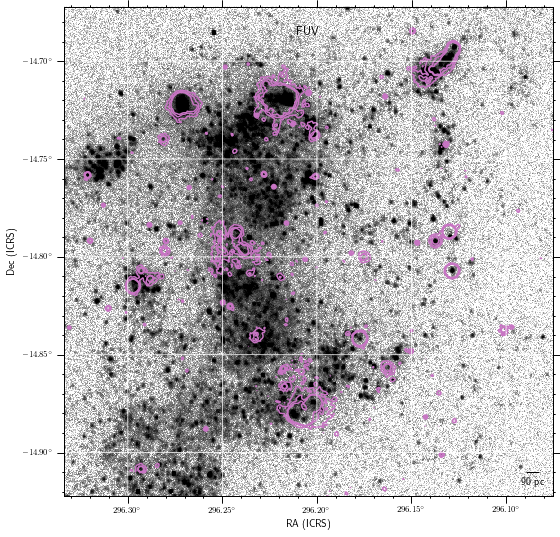

In [15]:
# Plot the FUV micron data with 24 micron contours

FUV = aplpy.FITSFigure(otherwav_path+NGC8622_FUV_file, north=True)

FUV.set_theme('publication')
FUV.set_system_latex(True)
FUV.show_grayscale(stretch='arcsinh', invert='True', vmin=9.5e-04 ) #,vmin=1.17, vmax=1.57)  #stretch: linear, log, sqrt, arcsinh, power

FUV.recenter(center_NGC6822.ra.deg, center_NGC6822.dec.deg, width=width, height=height)

FUV.show_contour('/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits', colors=sns.xkcd_rgb["orchid"],  levels=sigmalevels+median)

# Overlay a grid
FUV.add_grid()
FUV.grid.set_alpha(0.9)
FUV.grid.set_color('white')

# Add a scale bar
FUV.add_scalebar(24  * u.arcsecond )
FUV.scalebar.set_label('90 pc')

# Edit the TickLabels on the figure
FUV.tick_labels.set_xformat('d.dd')
FUV.tick_labels.set_yformat('d.dd')
FUV.tick_labels.set_font(size='small')


#FUV.add_colorbar()
#FUV.remove_colorbar()

FUV.add_label(0.5, 0.95, 'FUV', relative=True, color='black', weight="bold", size="large")


INFO: Auto-setting vmax to  6.844e-02 [aplpy.core]


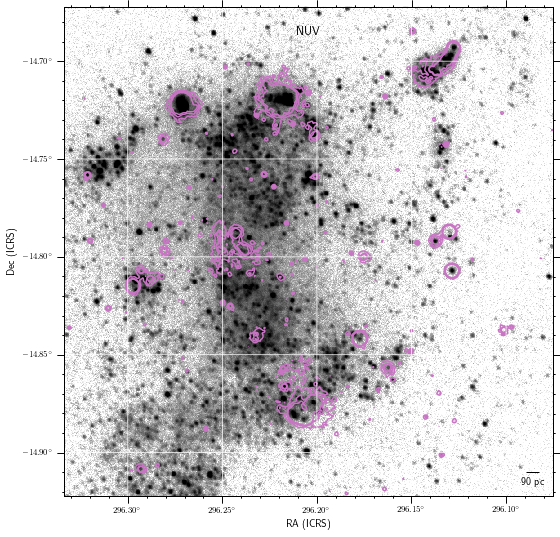

In [16]:
# Plot the NUV micron data with 24 micron contours

NUV = aplpy.FITSFigure(otherwav_path+NGC8622_NUV_file, north=True)

NUV.set_theme('publication')
NUV.set_system_latex(True)
NUV.show_grayscale(stretch='arcsinh', invert='True', vmin=6.5e-03 ) #,vmin=1.17, vmax=1.57)  #stretch: linear, log, sqrt, arcsinh, power

NUV.recenter(center_NGC6822.ra.deg, center_NGC6822.dec.deg, width=width, height=height)

NUV.show_contour('/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits', colors=sns.xkcd_rgb["orchid"],  levels=sigmalevels+median)

# Overlay a grid
NUV.add_grid()
NUV.grid.set_alpha(0.9)
NUV.grid.set_color('white')

# Add a scale bar
NUV.add_scalebar(24  * u.arcsecond )
NUV.scalebar.set_label('90 pc')

# Edit the TickLabels on the figure
NUV.tick_labels.set_xformat('d.dd')
NUV.tick_labels.set_yformat('d.dd')
NUV.tick_labels.set_font(size='small')


#NUV.add_colorbar()
#NUV.remove_colorbar()

NUV.add_label(0.5, 0.95, 'NUV', relative=True, color='black', weight="bold", size="large")


### Try making a 3hree colour image

INFO: Red: [aplpy.rgb]
INFO: vmin =  3.698e+01 (auto) [aplpy.rgb]
INFO: vmax =  4.312e+01 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  2.871e-03 (auto) [aplpy.rgb]
INFO: vmax =  5.392e-02 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  1.399e-05 (auto) [aplpy.rgb]
INFO: vmax =  9.406e-03 (auto) [aplpy.rgb]


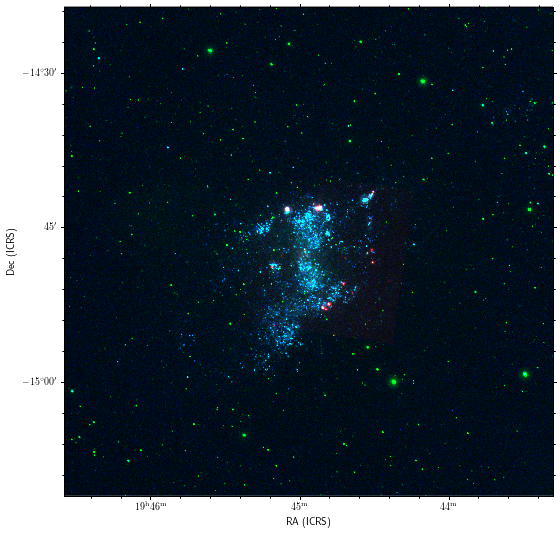

In [17]:
#Reproject the images to a common projection - this will also produce 2mass_cube_2d.fits
aplpy.make_rgb_cube(['/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits',
                     otherwav_path+NGC8622_NUV_file, otherwav_path+NGC8622_FUV_file], 'sf_tracer_cube.fits')

# Make an RGB image
aplpy.make_rgb_image('sf_tracer_cube.fits', 'sf_tracer_rgb.png')

# Plot the RGB image using the 2d image to indicate the projection
f = aplpy.FITSFigure('sf_tracer_cube_2d.fits')
f.show_rgb('sf_tracer_rgb.png')

 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
 [astropy.io.fits.verify]


INFO: Red: [aplpy.rgb]
INFO: vmin =  1.727e+02 (auto) [aplpy.rgb]
INFO: vmax =  1.432e+03 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  3.533e-03 (auto) [aplpy.rgb]
INFO: vmax =  4.517e-02 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  2.661e-04 (auto) [aplpy.rgb]
INFO: vmax =  1.109e-02 (auto) [aplpy.rgb]


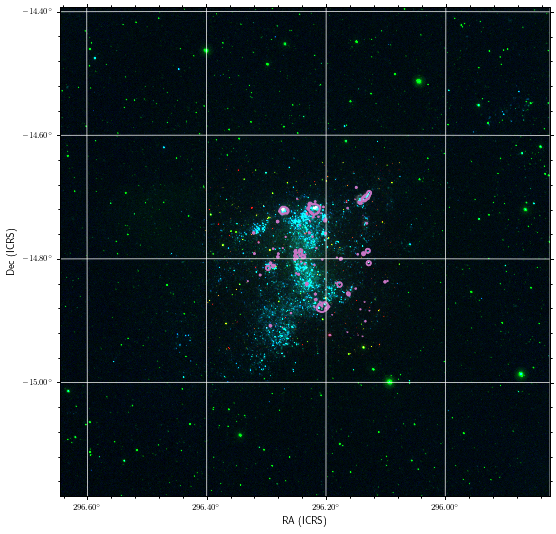

In [18]:
#Reproject the images to a common projection - this will also produce 2mass_cube_2d.fits
aplpy.make_rgb_cube([otherwav_path+NGC8622_Ha_file,
                     otherwav_path+NGC8622_NUV_file, otherwav_path+NGC8622_FUV_file], 'sf_tracer_cubeHA.fits')

# Make an RGB image
aplpy.make_rgb_image('sf_tracer_cubeHA.fits', 'sf_tracerHA_rgb.png')

# Plot the RGB image using the 2d image to indicate the projection
f = aplpy.FITSFigure('sf_tracer_cubeHA_2d.fits')
f.show_rgb('sf_tracerHA_rgb.png')

#Recenter the image
#f.recenter(center_NGC6822.ra.deg, center_NGC6822.dec.deg, width=width, height=height)

# Add the [24] contours
sigmalevels = [5*sig, 9*sig]
f.show_contour('/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits', colors=sns.xkcd_rgb["orchid"],  levels=sigmalevels+median)

# Overlay a grid
f.add_grid()
f.grid.set_alpha(0.9)
f.grid.set_color('white')

# Add a scale bar
#f.add_scalebar(24  * u.arcsecond )
#f.scalebar.set_label('90 pc')

# Edit the TickLabels on the figure
f.tick_labels.set_xformat('d.dd')
f.tick_labels.set_yformat('d.dd')
f.tick_labels.set_font(size='small')

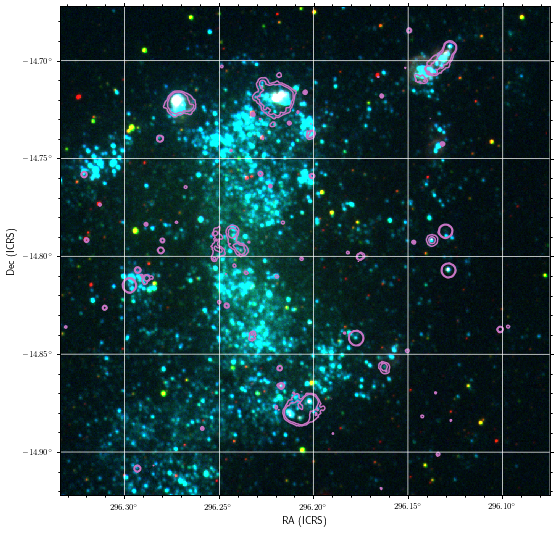

In [19]:
# Plot the RGB image using the 2d image to indicate the projection
f = aplpy.FITSFigure('sf_tracer_cubeHA_2d.fits')
f.show_rgb('sf_tracerHA_rgb.png')

#Recenter the image
f.recenter(center_NGC6822.ra.deg, center_NGC6822.dec.deg, width=width, height=height)

# Add the [24] contours
sigmalevels = [5*sig, 9*sig]
f.show_contour('/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits', colors=sns.xkcd_rgb["orchid"],  levels=sigmalevels+median)

# Overlay a grid
f.add_grid()
f.grid.set_alpha(0.9)
f.grid.set_color('white')

# Add a scale bar
#f.add_scalebar(24  * u.arcsecond )
#f.scalebar.set_label('90 pc')

# Edit the TickLabels on the figure
f.tick_labels.set_xformat('d.dd')
f.tick_labels.set_yformat('d.dd')
f.tick_labels.set_font(size='small')

INFO: Red: [aplpy.rgb]
INFO: vmin =  3.697e+01 (auto) [aplpy.rgb]
INFO: vmax =  3.993e+01 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  7.273e+00 (auto) [aplpy.rgb]
INFO: vmax =  1.055e+01 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  7.695e-02 (auto) [aplpy.rgb]
INFO: vmax =  5.108e+00 (auto) [aplpy.rgb]


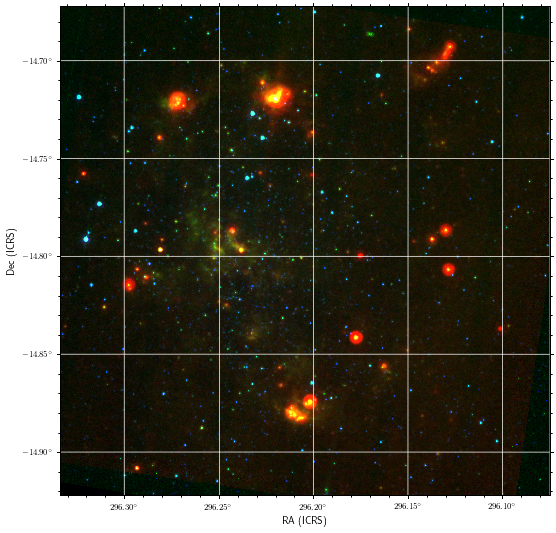

In [23]:
#Reproject the images to a common projection - this will also produce 2mass_cube_2d.fits
aplpy.make_rgb_cube(['/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits',
                     '/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_I4_cutout.fits',
                     Spitzer_path+NGC8622_3_file], 'IR_cube.fits')

# Make an RGB image
aplpy.make_rgb_image('IR_cube.fits', 'IR_rgb.png')

# Plot the RGB image using the 2d image to indicate the projection
f = aplpy.FITSFigure('IR_cube_2d.fits')
f.show_rgb('IR_rgb.png')

#Recenter the image
f.recenter(center_NGC6822.ra.deg, center_NGC6822.dec.deg, width=width, height=height)

# Add the [24] contours
#sigmalevels = [5*sig, 9*sig]
#f.show_contour('/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits', colors=sns.xkcd_rgb["orchid"],  levels=sigmalevels+median)

# Overlay a grid
f.add_grid()
f.grid.set_alpha(0.9)
f.grid.set_color('white')

# Add a scale bar
#f.add_scalebar(24  * u.arcsecond )
#f.scalebar.set_label('90 pc')

# Edit the TickLabels on the figure
f.tick_labels.set_xformat('d.dd')
f.tick_labels.set_yformat('d.dd')
f.tick_labels.set_font(size='small')

 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
 [astropy.io.fits.verify]


INFO: Red: [aplpy.rgb]
INFO: vmin =  3.697e+01 (auto) [aplpy.rgb]
INFO: vmax =  3.983e+01 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  7.245e+00 (auto) [aplpy.rgb]
INFO: vmax =  9.376e+00 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  7.880e-02 (auto) [aplpy.rgb]
INFO: vmax =  4.278e+00 (auto) [aplpy.rgb]


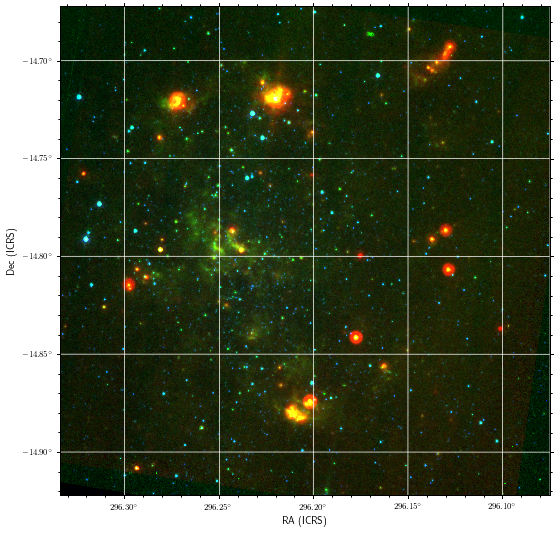

In [25]:
#Reproject the images to a common projection - this will also produce 2mass_cube_2d.fits
aplpy.make_rgb_cube(['/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits',
                     '/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_I4_cutout.fits',
                     Spitzer_path+NGC8622_3_file, otherwav_path+NGC8622_Ha_file], 'IR_cube.fits')

# Make an RGB image
aplpy.make_rgb_image('IR_cube.fits', 'IR_rgb.png')

# Plot the RGB image using the 2d image to indicate the projection
f = aplpy.FITSFigure('IR_cube_2d.fits')
f.show_rgb('IR_rgb.png')

#Recenter the image
f.recenter(center_NGC6822.ra.deg, center_NGC6822.dec.deg, width=width, height=height)

# Add the [24] contours
#sigmalevels = [5*sig, 9*sig]
#f.show_contour('/Users/ojones/Desktop/NGC6822/spitzerMaps/n6822_M1_cutout.fits', colors=sns.xkcd_rgb["orchid"],  levels=sigmalevels+median)

# Overlay a grid
f.add_grid()
f.grid.set_alpha(0.9)
f.grid.set_color('white')

# Add a scale bar
#f.add_scalebar(24  * u.arcsecond )
#f.scalebar.set_label('90 pc')

# Edit the TickLabels on the figure
f.tick_labels.set_xformat('d.dd')
f.tick_labels.set_yformat('d.dd')
f.tick_labels.set_font(size='small')